# Breast cancer  Prediction using Logistic Regression

Scikit-learn ships with the Breast Cancer Wisconsin (Diagnostic) Data Set. 

It is a classic dataset that is often used to illustrate binary classifications. This dataset contains 30 features, and they are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. The label of the dataset is a binary classification—M for malignant or B for benign.

Real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

We have mean, standard error, worst (largest) for each of these features of 569 observations.

**2 Types of Tumor?**

A tumor is a mass of abnormal tissue. There are two types of breast cancer tumors: those that are non-cancerous, or ‘**benign**’, and those that are cancerous, which are ‘**malignant**’.*

You can load the Breast Cancer dataset by first importing the datasets module
from sklearn. Then use the `load_breast_cancer()` function as follows:

In [1]:
# Using the Breast Cancer Wisconsin (Diagnostic) Data Set

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [2]:
# cancer_view = load_breast_cancer(as_frame=True)
# print(cancer_view)

In [3]:
# splitting the data into train - test

from sklearn.model_selection import train_test_split
train_set, test_set, train_labels, test_labels = train_test_split(cancer.data, cancer.target, 
                                                                  test_size = 0.25, random_state = 1)

# train_set, test_set, train_labels, test_labels = train_test_split(cancer.data, cancer.target, 
#                                                                   test_size = 0.25, random_state = 1,
#                                                                   stratify = cancer.target)

The stratify parameter allows you to
specify which column (feature/label) to use so that the split is proportionate.
For example, if the column specified is a categorical variable with 80 percent 0s
and 20 percent 1s, then the training and test sets would each have 80 percent
of 0s and 20 percent of 1s.

In [4]:
# train the model

from sklearn import linear_model
X_train = train_set[:,0:30] # mean radiuses
y_train = train_labels # 0: malignant, 1: benign

X_test = test_set[:,0:30] # mean radiuses
y_test = test_labels # 0: malignant, 1: benign

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
log_regress = linear_model.LogisticRegression()
log_regress.fit(X = X_train,y = y_train)

LogisticRegression()

In this example, we are training it with all of the 30 features in the dataset.
When the training is done, let’s print out the intercept and model coefficients:

In [7]:
import pandas as pd

#---get the predicted probablities and convert into a dataframe---
preds_prob = pd.DataFrame(log_regress.predict_proba(X = X_test))

#---assign column names to prediction---
preds_prob.columns = ["Malignant", "Benign"]

#---get the predicted class labels---
preds = log_regress.predict(X = X_test)
preds_class = pd.DataFrame(preds)
preds_class.columns = ["Prediction"]

#---actual diagnosis---
original_result = pd.DataFrame(y_test)
original_result.columns = ["Original Result"]

#---merge the three dataframes into one---
result = pd.concat([preds_prob, preds_class, original_result], axis=1)

print(result.head())

   Malignant    Benign  Prediction  Original Result
0   0.149489  0.850511           1                1
1   0.989657  0.010343           0                0
2   0.009872  0.990128           1                1
3   0.994890  0.005110           0                0
4   0.894371  0.105629           0                0


In [8]:
from sklearn import metrics

#---view the confusion matrix---
confus_matrix = metrics.confusion_matrix(y_true = y_test, y_pred = preds)

print(confus_matrix) # Predicted labels

[[53  2]
 [ 1 87]]


The columns represent the actual diagnosis (0 for malignant and 1 for benign).
The rows represent the prediction. Each individual box represents one of the
following:

- True Positive (TP): The model correctly predicts the outcome as positive. In this example, the number of TP (87) indicates the number of correct predictions that a tumor is benign.


- True Negative (TN): The model correctly predicts the outcome as negative. In this example, tumors were correctly predicted to be malignant.


- False Positive (FP): The model incorrectly predicted the outcome as positive, but the actual result is negative. In this example, it means that the tumor is actually malignant, but the model predicted the tumor to be benign.


- False Negative (FN): The model incorrectly predicted the outcome as negative, but the actual result is positive. In this example, it means that the tumor is actually benign, but the model predicted the tumor to be malignant.
This set of numbers is known as the confusion matrix.

Text(0.5, 257.44, 'Predicted label')

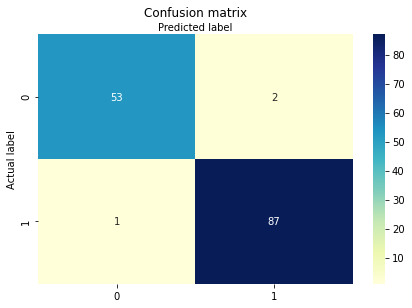

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# class_names=[0,1] # name  of classes
class_names=["malignant","benign"]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(confus_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [10]:
#---get the accuracy of the prediction---

print("---Accuracy---")
print(log_regress.score(X = X_test , y = y_test))

---Accuracy---
0.9790209790209791


In [11]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, preds))
print("Precision:",metrics.precision_score(y_test, preds))
print("Recall:",metrics.recall_score(y_test, preds))
print("f1:",metrics.f1_score(y_test,preds))

Accuracy: 0.9790209790209791
Precision: 0.9775280898876404
Recall: 0.9886363636363636
f1: 0.983050847457627


In [12]:
# View summary of common classification metrics
print("---Metrices---")
print(metrics.classification_report(y_true = y_test, y_pred = preds))

---Metrices---
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        55
           1       0.98      0.99      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



The concept of precision and recall may not be apparent immediately, but if you consider the following scenario, it will be much clearer. Consider the case of breast cancer diagnosis. If a malignant tumor is represented as negative and a benign tumor is represented as positive, then:

-  If the precision or recall is high, it means that more patients with benign tumors are diagnosed correctly, which indicates that the algorithm is good.


- If the precision is low, it means that more patients with malignant tumors are diagnosed as benign.


- If the recall is low, it means that more patients with benign tumors are diagnosed as malignant.

In [13]:
from sklearn.metrics import roc_curve, auc

#---find the predicted probabilities using the test set
probs = log_regress.predict_proba(X_test)
preds = probs[:,1]

#---find the FPR, TPR, and threshold---
fpr, tpr, threshold = roc_curve(test_labels, preds)

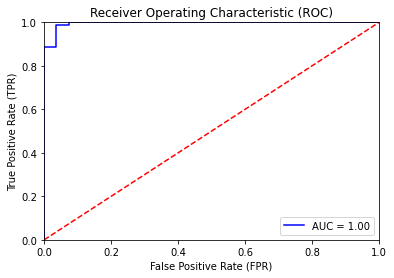

In [14]:
#---find the area under the curve---

roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()